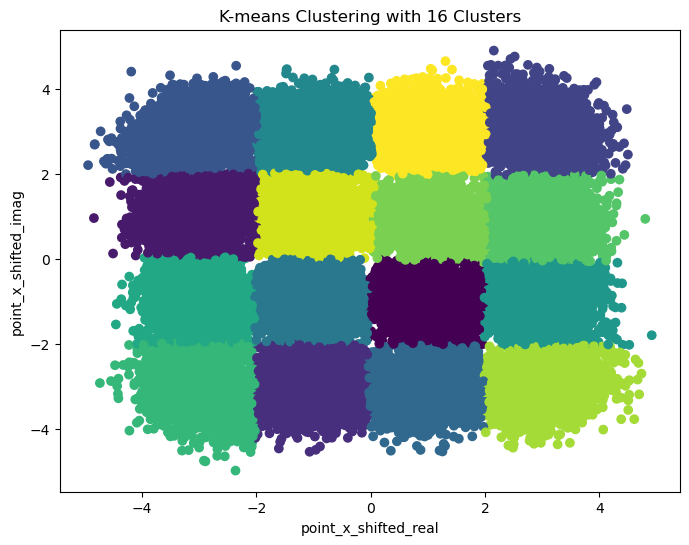

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pyarrow.parquet as pq
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# Specify the file path
file_path = "data_collected_errorstat_wo_noise_1_run=111.parquet"

# Use pyarrow to read the Parquet file
table = pq.read_table(file_path)
# Convert the table to a pandas DataFrame if needed
df = table.to_pandas()

import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the features for clustering
X = df[['point_x_shifted_real', 'point_x_shifted_imag']]

# Perform K-means clustering with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['point_x_shifted_real'], X['point_x_shifted_imag'], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering with 16 Clusters')
plt.xlabel('point_x_shifted_real')
plt.ylabel('point_x_shifted_imag')
plt.show()


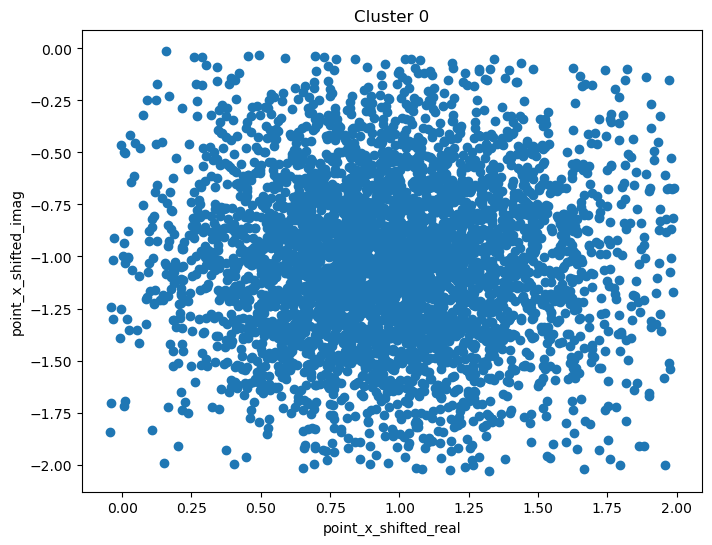

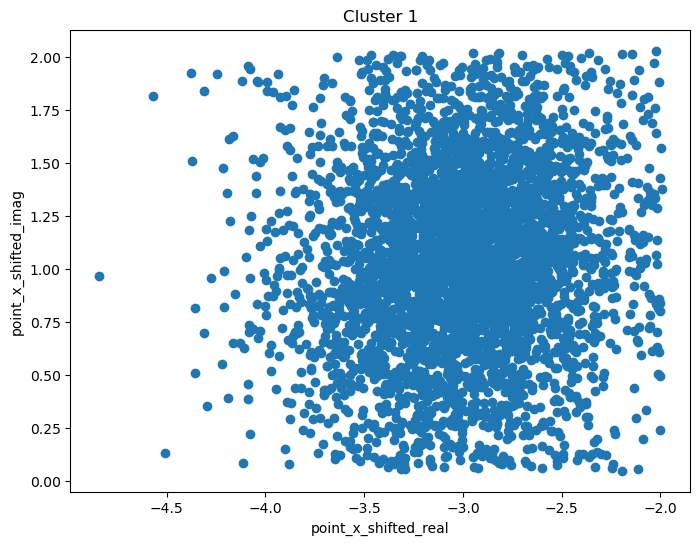

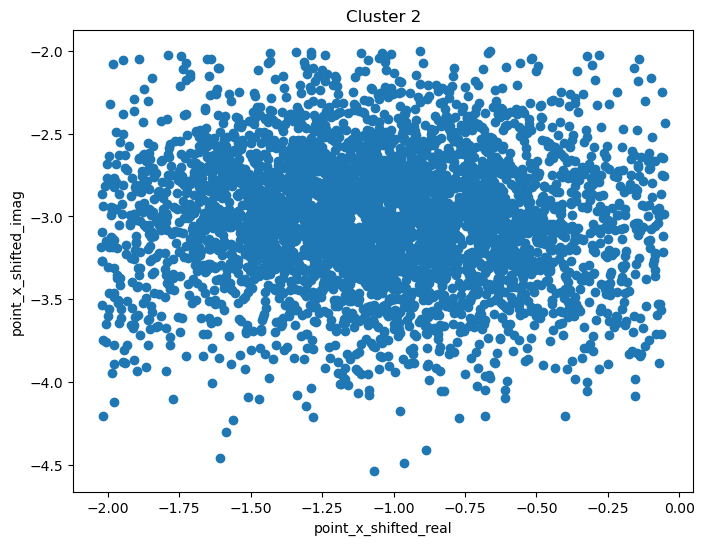

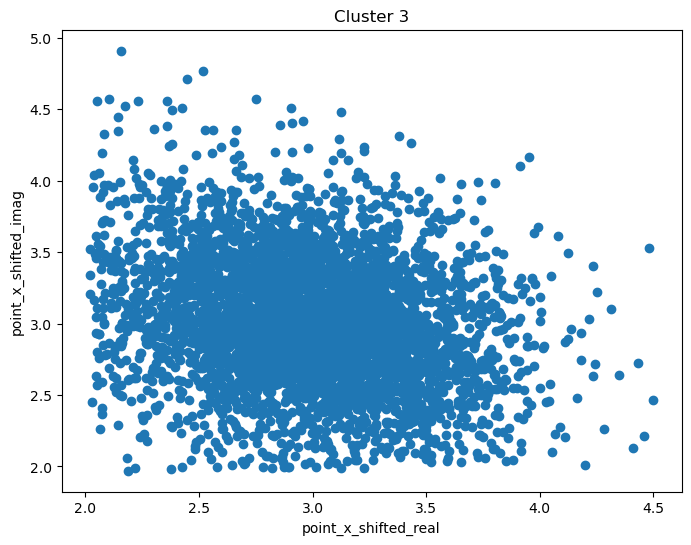

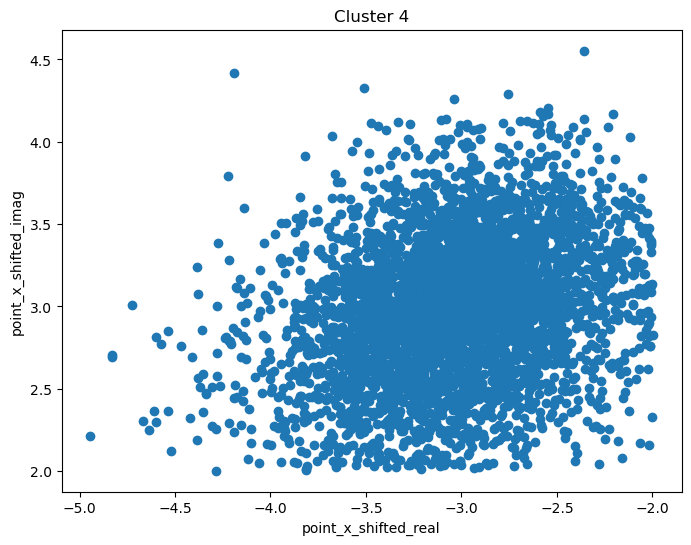

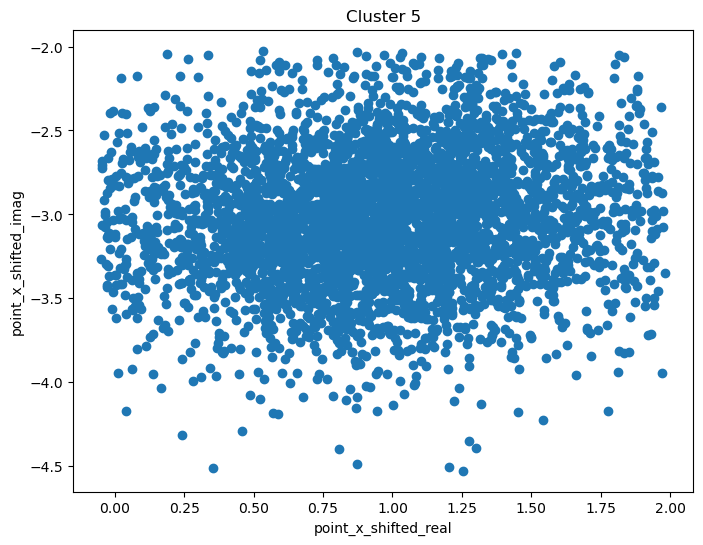

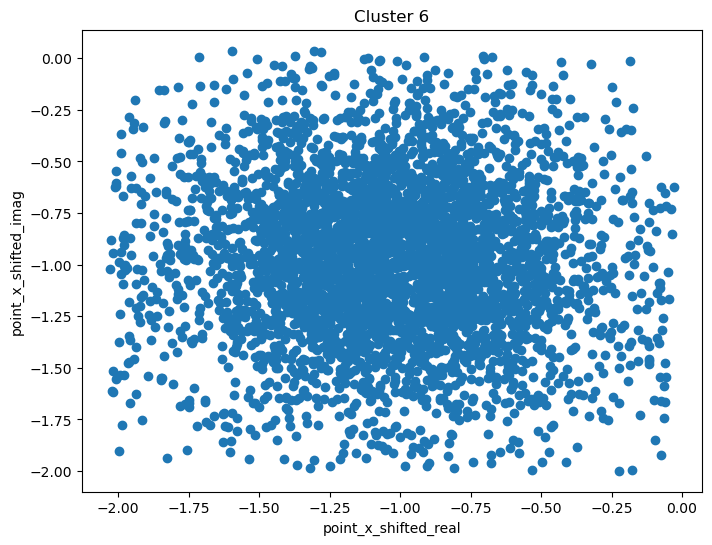

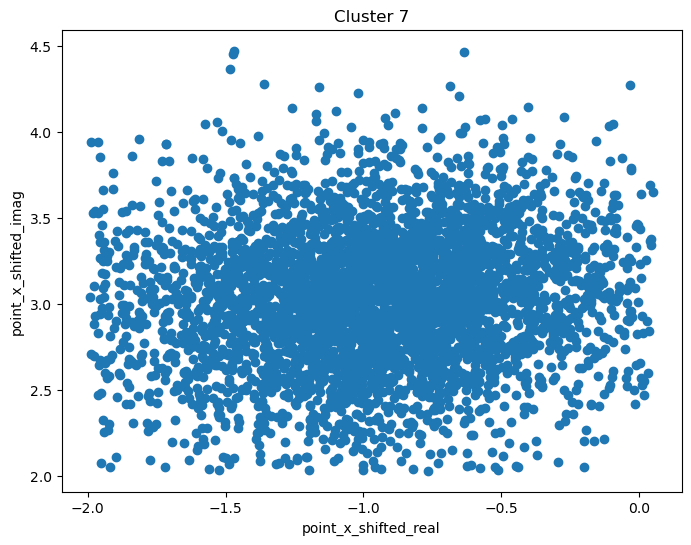

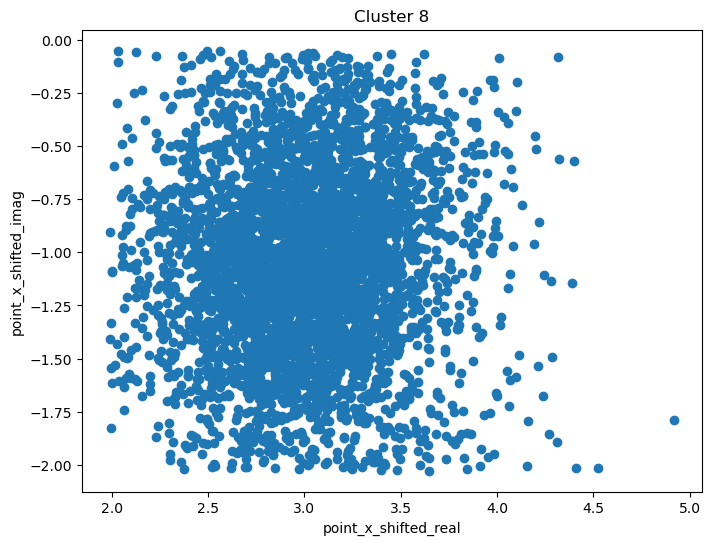

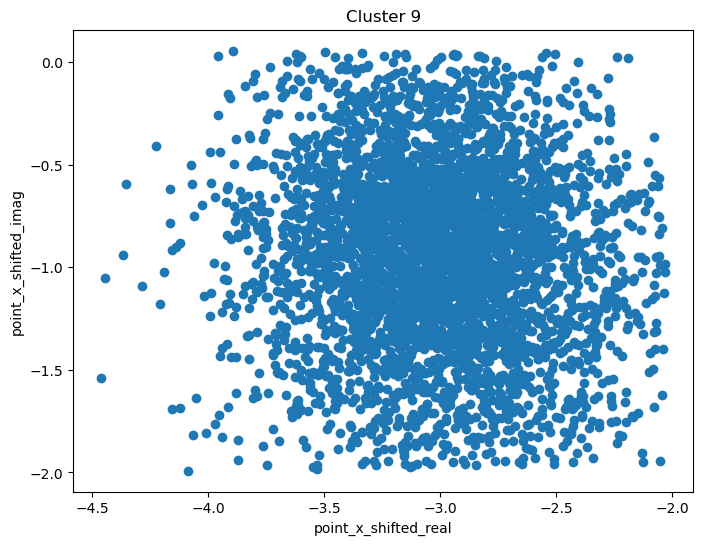

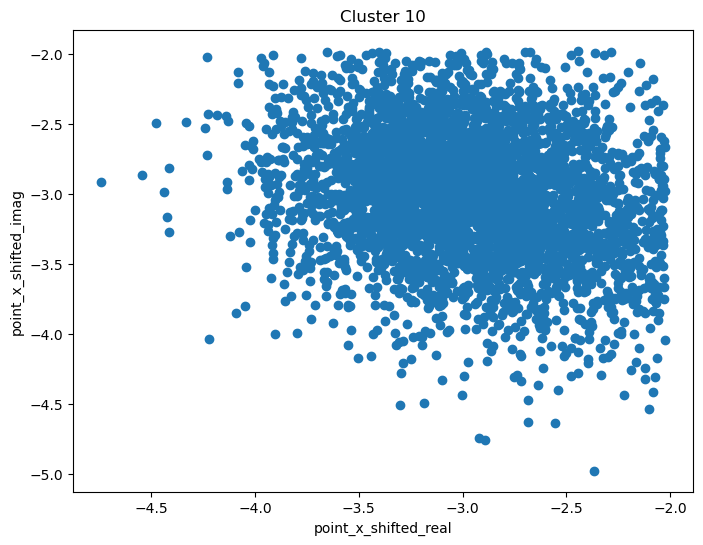

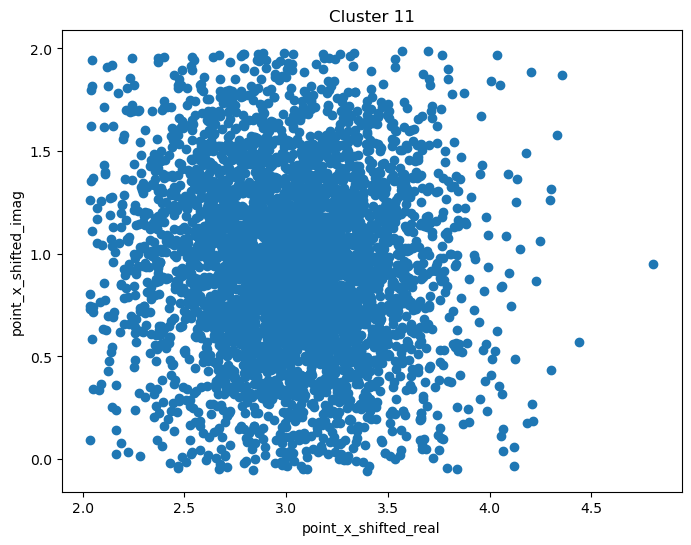

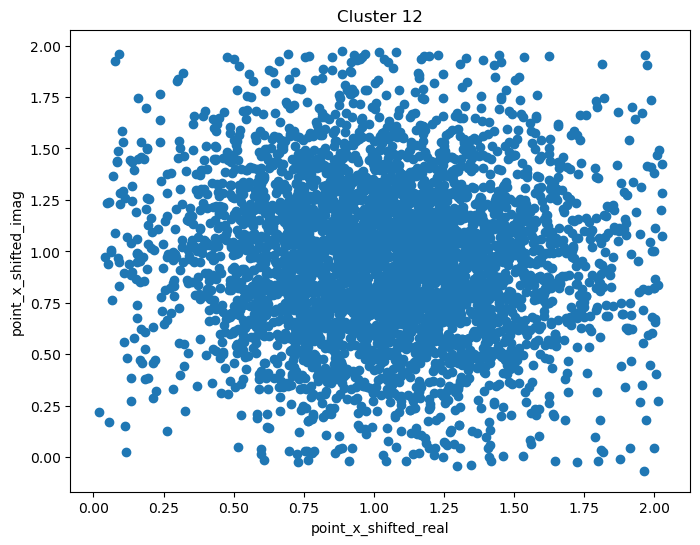

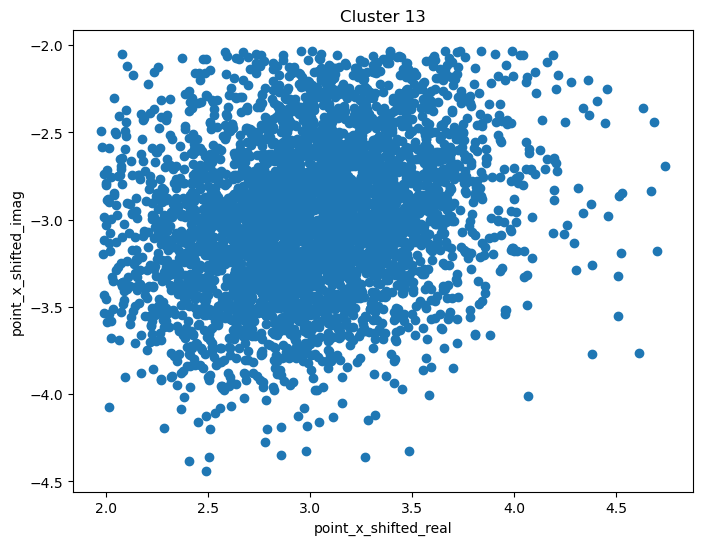

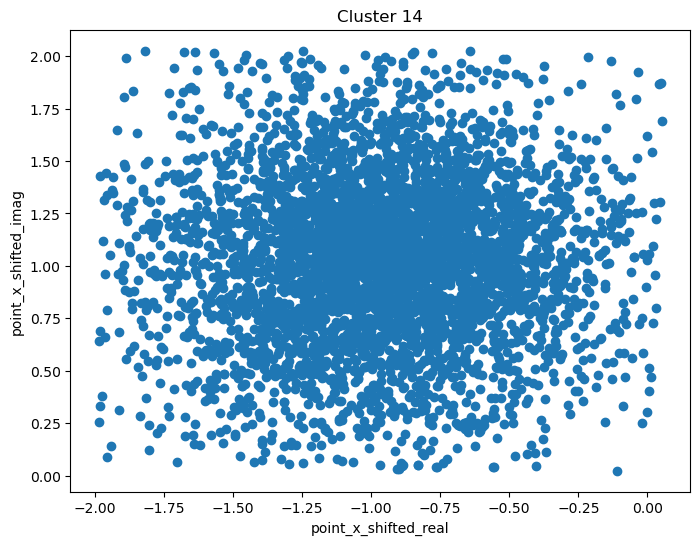

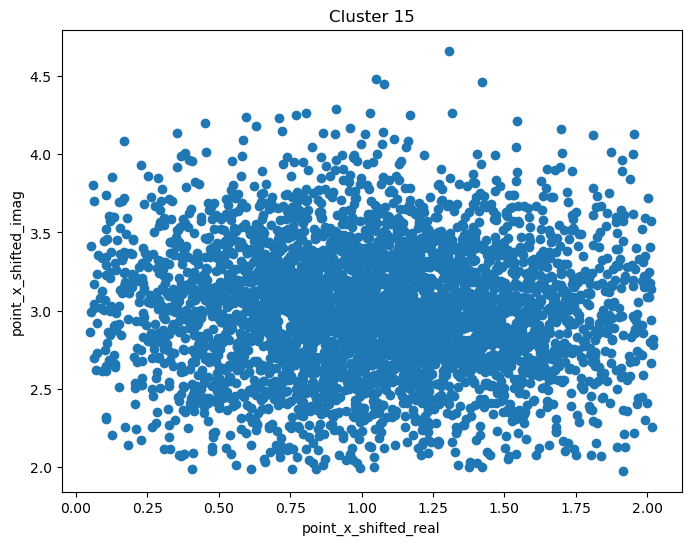

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the features for clustering
X = df[['point_x_shifted_real', 'point_x_shifted_imag']]

# Perform K-means clustering with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Create a figure for each cluster
for cluster_num in range(16):
    plt.figure(figsize=(8, 6))
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['point_x_shifted_real'], cluster_data['point_x_shifted_imag'], cmap='viridis')
    plt.title(f'Cluster {cluster_num}')
    plt.xlabel('point_x_shifted_real')
    plt.ylabel('point_x_shifted_imag')
    plt.show()


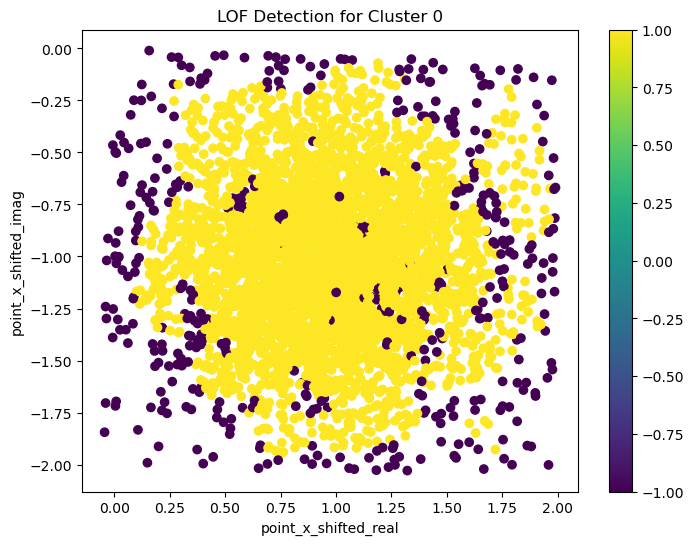

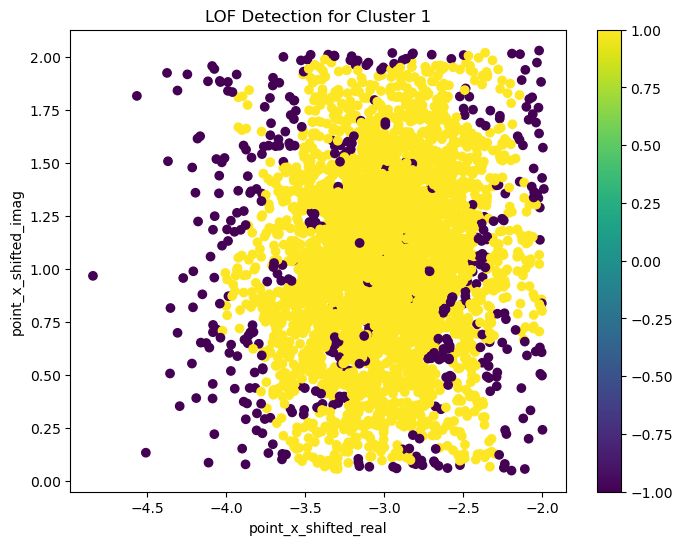

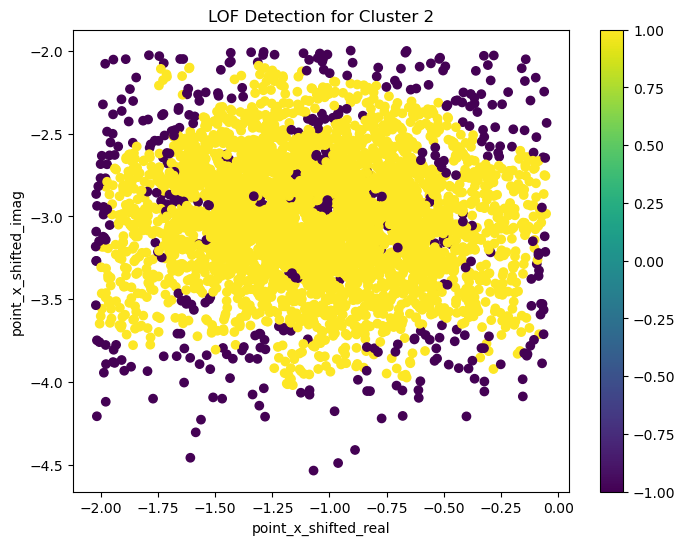

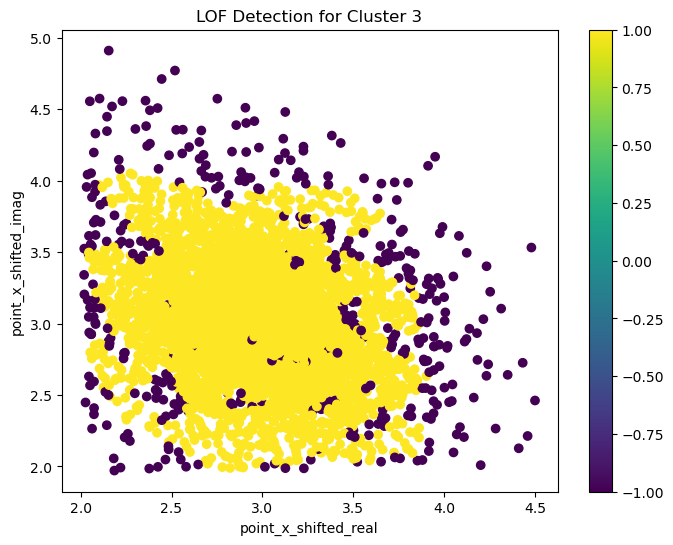

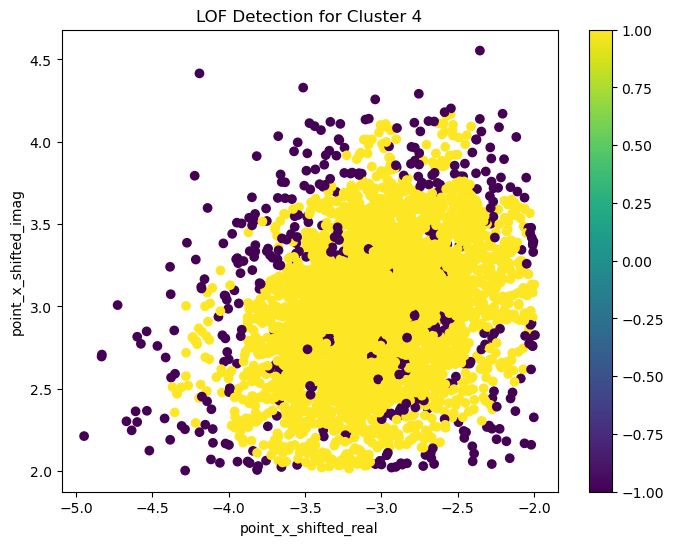

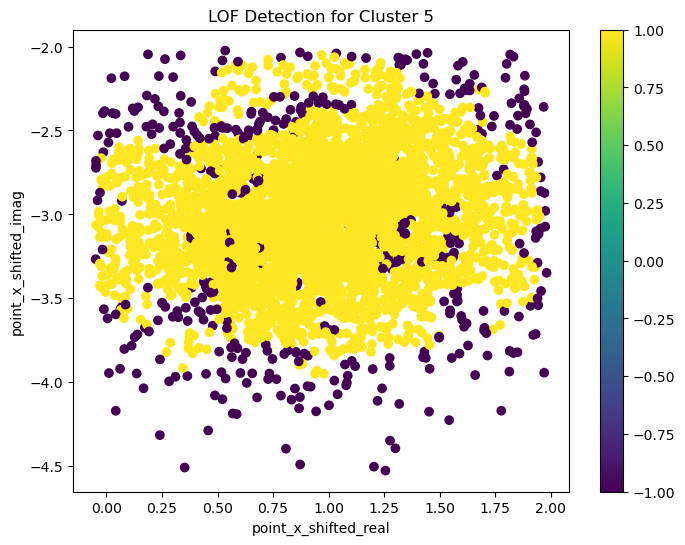

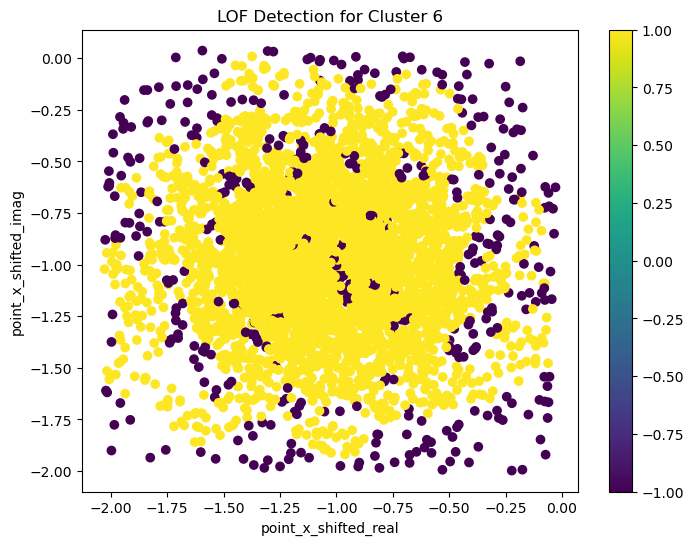

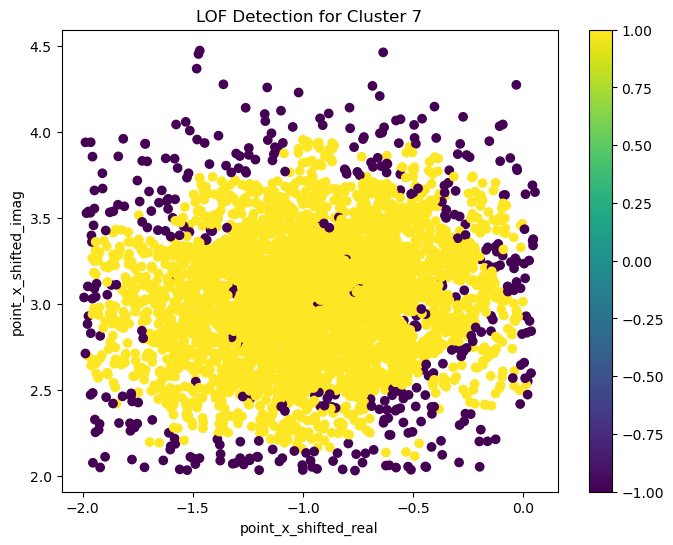

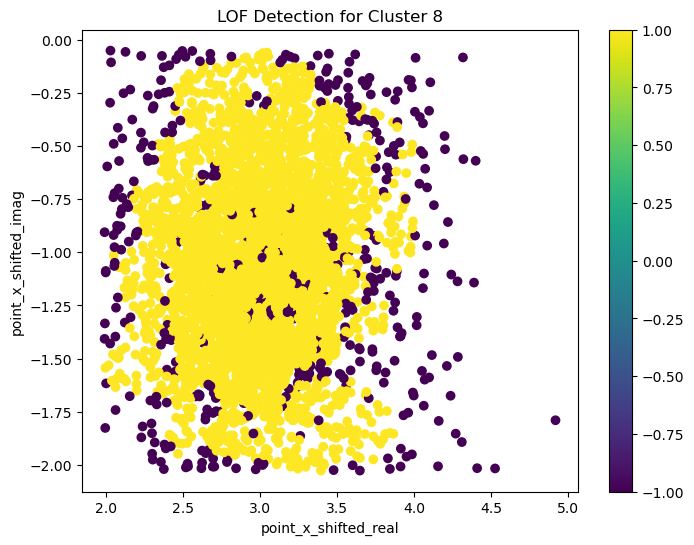

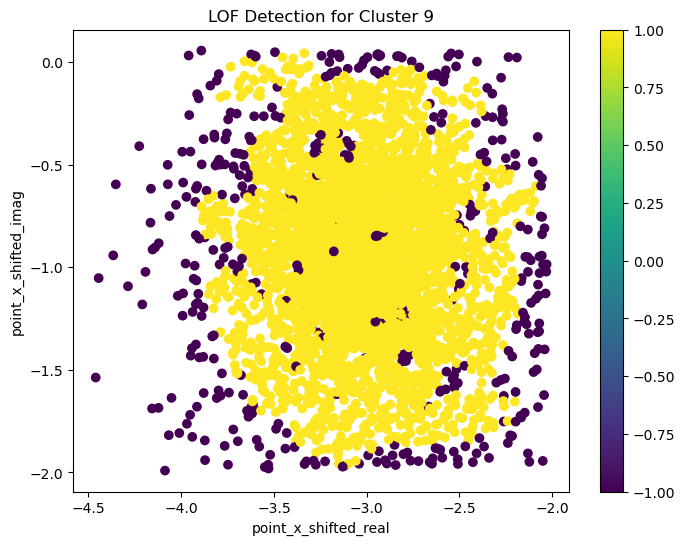

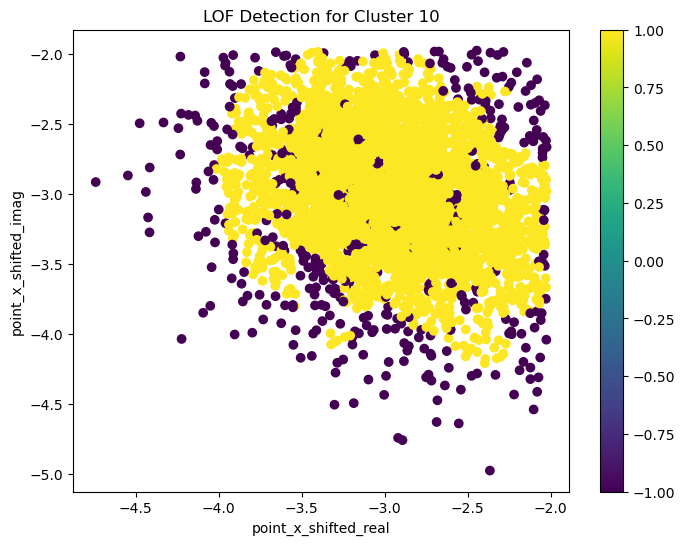

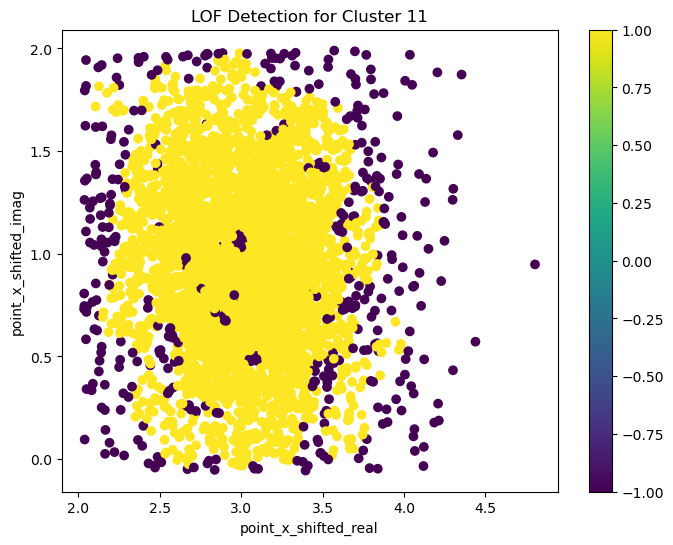

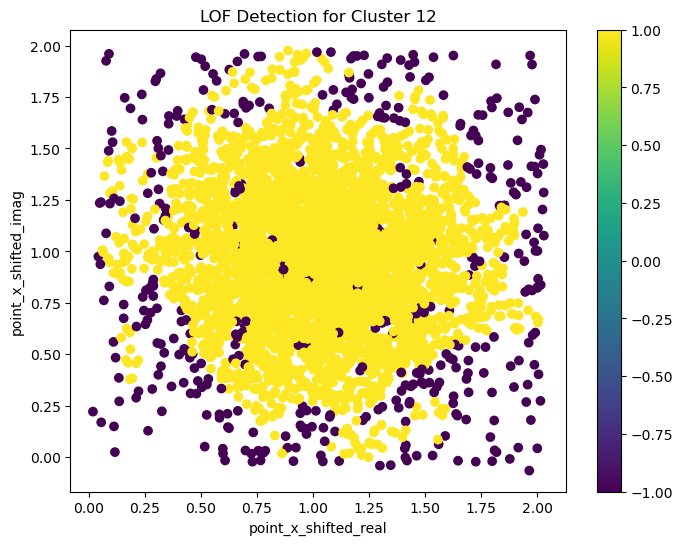

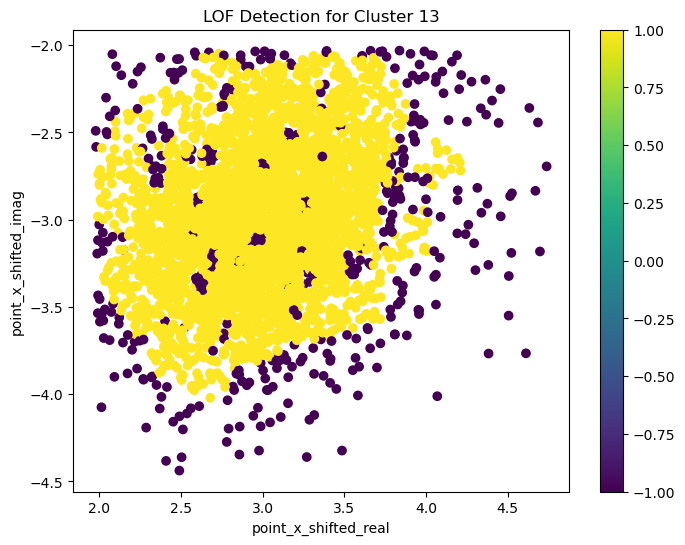

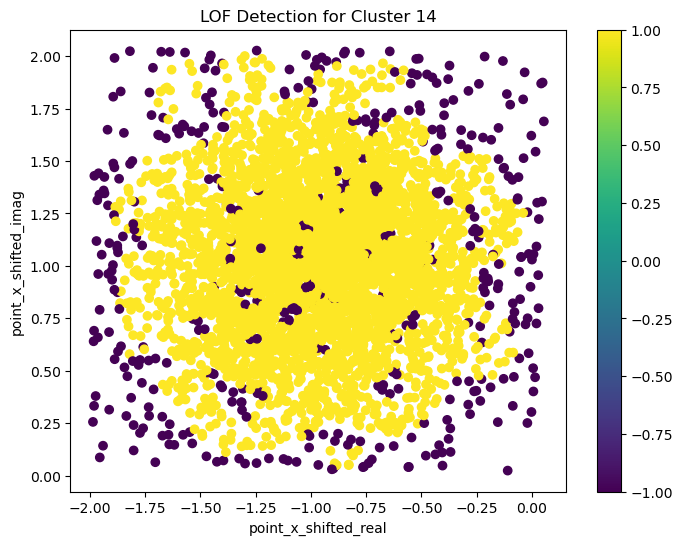

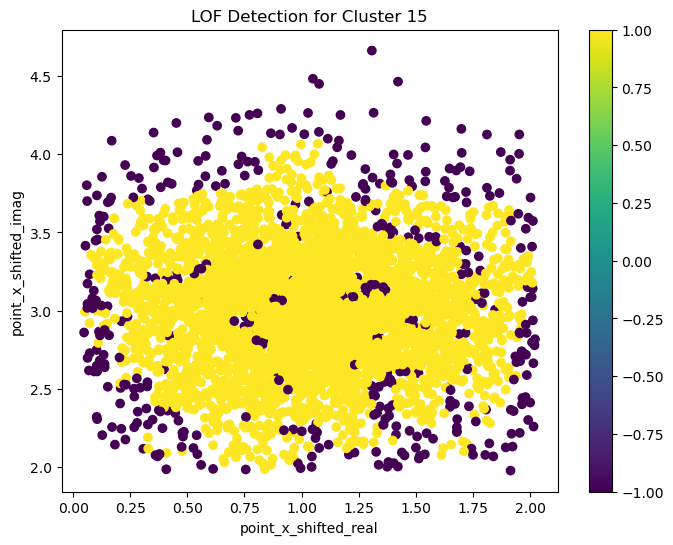

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the features for clustering
X = df[['point_x_shifted_real', 'point_x_shifted_imag']]

# Perform K-means clustering with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Create a figure for each cluster
for cluster_num in range(16):
    cluster_data = df[df['cluster'] == cluster_num]
    
    # Extract data for the current cluster
    cluster_X = cluster_data[['point_x_shifted_real', 'point_x_shifted_imag']]
    
    # Perform LOF detection
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
    lof_scores = lof.fit_predict(cluster_X)
    
    # Mark outliers
    cluster_data['lof_score'] = lof_scores
    
    # Create a scatter plot with outliers highlighted
    plt.figure(figsize=(8, 6))
    plt.scatter(cluster_X['point_x_shifted_real'], cluster_X['point_x_shifted_imag'], c=cluster_data['lof_score'], cmap='viridis')
    plt.title(f'LOF Detection for Cluster {cluster_num}')
    plt.xlabel('point_x_shifted_real')
    plt.ylabel('point_x_shifted_imag')
    plt.colorbar()
    plt.show()


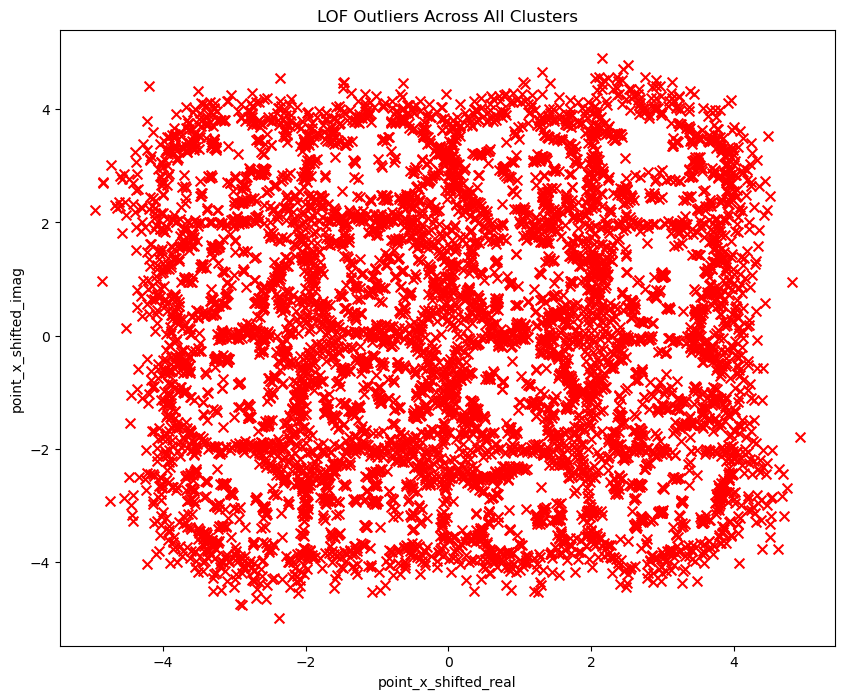

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the 'df' DataFrame

# Select the features for clustering
X = df[['point_x_shifted_real', 'point_x_shifted_imag']]

# Perform K-means clustering with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Create a list to collect LOF outlier points
lof_outliers = []

# Loop through each cluster
for cluster_num in range(16):
    cluster_data = df[df['cluster'] == cluster_num]
    
    # Extract data for the current cluster
    cluster_X = cluster_data[['point_x_shifted_real', 'point_x_shifted_imag']]
    
    # Perform LOF detection
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
    lof_scores = lof.fit_predict(cluster_X)
    
    # Collect LOF outlier points
    lof_outliers.extend(cluster_X[lof_scores == -1].values)

# Convert the list of LOF outlier points to a NumPy array
lof_outliers = np.array(lof_outliers)

# Create a scatter plot for all LOF outliers
plt.figure(figsize=(10, 8))
plt.scatter(lof_outliers[:, 0], lof_outliers[:, 1], c='red', marker='x', s=50)
plt.title('LOF Outliers Across All Clusters')
plt.xlabel('point_x_shifted_real')
plt.ylabel('point_x_shifted_imag')
plt.show()


In [12]:
np.shape(lof_outliers[:, 0])

(6557,)

In [7]:
# After running the previous code to collect LOF outliers

# Check the number of LOF outliers
num_lof_outliers = lof_outliers.shape[0]
print(f'The total number of LOF outliers is: {num_lof_outliers}')


The total number of LOF outliers is: 6560


In [13]:
df

minus_m_1_orig_x_real  point_orig_x_real  plus_m_1_orig_x_real  \
0                       -3.0               -3.0                  -1.0   
1                       -3.0               -1.0                  -3.0   
2                       -1.0               -3.0                   1.0   
3                       -3.0                1.0                  -3.0   
4                        1.0               -3.0                  -3.0   
...                      ...                ...                   ...   
65531                    1.0               -3.0                  -3.0   
65532                   -3.0               -3.0                   1.0   
65533                   -3.0                1.0                  -1.0   
65534                    1.0               -1.0                  -3.0   
65535                   -1.0               -3.0                  -3.0   

       minus_m_1_orig_x_imag  point_orig_x_imag  plus_m_1_orig_x_imag  \
0                       -3.0                3.0                   1.0   
1                        3.0                1.0                   1.0   
2                        1.0                1.0                  -3.0   
3                        1.0               -3.0                  -1.0   
4                       -3.0               -1.0                   3.0   
...                      ...                ...                   ...   
65531                    1.0               -1.0                   1.0   
65532                   -1.0                1.0                   1.0   
65533                    1.0                1.0                   1.0   
65534                    1.0                1.0                  -3.0   
65535                    1.0               -3.0                   3.0   

       point_label  point_x_shifted_real  point_x_shifted_imag  cluster  
0              0.0             -2.734536              3.384940        4  
1              5.0             -0.647851              1.189005       14  
2              4.0             -2.845992              1.267370        1  
3             11.0              0.345594             -3.245194        5  
4             12.0             -3.023620             -0.685249        9  
...            ...                   ...                   ...      ...  
65531         12.0             -2.922408             -0.572902        9  
65532          4.0             -3.028055              1.323139        1  
65533          7.0              1.284024              0.476859       12  
65534          5.0             -0.567574              1.111767       14  
65535          8.0             -3.194994             -2.846173       10  

[65536 rows x 10 columns]

In [19]:
# After running the code to collect LOF outliers

# Create a list to store the 'point_label' values for each LOF outlier
lof_outlier_labels = []

# Loop through each LOF outlier and find its corresponding 'point_label' value
for lof_outlier in lof_outliers:
    # Find the index of the outlier in the original DataFrame
    index = (df['point_x_shifted_real'] == lof_outlier[0]) & (df['point_x_shifted_imag'] == lof_outlier[1])
    point_label = df[index]['point_label'].values[0]  # Assuming 'point_label' is unique
    lof_outlier_labels.append(point_label)

# Now, lof_outlier_labels contains the 'point_label' values for each LOF outlier
np.shape(lof_outlier_labels)

(6557,)

In [20]:
# Assuming 'point_label' directly corresponds to cluster numbers
df['cluster'] = df['point_label']


In [21]:
df

minus_m_1_orig_x_real  point_orig_x_real  plus_m_1_orig_x_real  \
0                       -3.0               -3.0                  -1.0   
1                       -3.0               -1.0                  -3.0   
2                       -1.0               -3.0                   1.0   
3                       -3.0                1.0                  -3.0   
4                        1.0               -3.0                  -3.0   
...                      ...                ...                   ...   
65531                    1.0               -3.0                  -3.0   
65532                   -3.0               -3.0                   1.0   
65533                   -3.0                1.0                  -1.0   
65534                    1.0               -1.0                  -3.0   
65535                   -1.0               -3.0                  -3.0   

       minus_m_1_orig_x_imag  point_orig_x_imag  plus_m_1_orig_x_imag  \
0                       -3.0                3.0                   1.0   
1                        3.0                1.0                   1.0   
2                        1.0                1.0                  -3.0   
3                        1.0               -3.0                  -1.0   
4                       -3.0               -1.0                   3.0   
...                      ...                ...                   ...   
65531                    1.0               -1.0                   1.0   
65532                   -1.0                1.0                   1.0   
65533                    1.0                1.0                   1.0   
65534                    1.0                1.0                  -3.0   
65535                    1.0               -3.0                   3.0   

       point_label  point_x_shifted_real  point_x_shifted_imag  cluster  
0              0.0             -2.734536              3.384940      0.0  
1              5.0             -0.647851              1.189005      5.0  
2              4.0             -2.845992              1.267370      4.0  
3             11.0              0.345594             -3.245194     11.0  
4             12.0             -3.023620             -0.685249     12.0  
...            ...                   ...                   ...      ...  
65531         12.0             -2.922408             -0.572902     12.0  
65532          4.0             -3.028055              1.323139      4.0  
65533          7.0              1.284024              0.476859      7.0  
65534          5.0             -0.567574              1.111767      5.0  
65535          8.0             -3.194994             -2.846173      8.0  

[65536 rows x 10 columns]

In [22]:
# Group the DataFrame by 'point_label' and calculate the mean for 'point_x_shifted_real' and 'point_x_shifted_imag' columns
label_means = df.groupby('point_label')[['point_x_shifted_real', 'point_x_shifted_imag']].mean()

# You can also reset the index if you want 'point_label' to be a regular column
# label_means = label_means.reset_index()

# Display the average values for each 'point_label'
print(label_means)


             point_x_shifted_real  point_x_shifted_imag
point_label                                            
0.0                     -3.042457              2.966437
1.0                     -0.974437              3.016749
2.0                      2.967152              3.025179
3.0                      1.014799              2.994923
4.0                     -2.997284              1.019399
5.0                     -0.971251              1.021278
6.0                      3.009173              0.978635
7.0                      1.026768              0.961729
8.0                     -2.959663             -3.023483
9.0                     -1.022823             -3.005809
10.0                     3.024990             -2.964125
11.0                     0.981515             -3.013057
12.0                    -3.005428             -0.973736
13.0                    -1.029222             -0.974009
14.0                     2.997462             -1.022565
15.0                     0.971583             -1

In [23]:
# Group the DataFrame by 'cluster' and calculate the mean for 'point_x_shifted_real' and 'point_x_shifted_imag' columns
cluster_means = df.groupby('cluster')[['point_x_shifted_real', 'point_x_shifted_imag']].mean()

# You can also reset the index if you want 'cluster' to be a regular column
# cluster_means = cluster_means.reset_index()

# Display the average values for each cluster
print(cluster_means)


         point_x_shifted_real  point_x_shifted_imag
cluster                                            
0.0                 -3.042457              2.966437
1.0                 -0.974437              3.016749
2.0                  2.967152              3.025179
3.0                  1.014799              2.994923
4.0                 -2.997284              1.019399
5.0                 -0.971251              1.021278
6.0                  3.009173              0.978635
7.0                  1.026768              0.961729
8.0                 -2.959663             -3.023483
9.0                 -1.022823             -3.005809
10.0                 3.024990             -2.964125
11.0                 0.981515             -3.013057
12.0                -3.005428             -0.973736
13.0                -1.029222             -0.974009
14.0                 2.997462             -1.022565
15.0                 0.971583             -1.016872
